<a href="https://colab.research.google.com/github/YeabsiraNigusse/machine-Learning/blob/main/Model%20Evaluation%20and%20Selection/Model%20Evaluation%20and%20Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Modele Evaluation and Selection

#### what we will do
- split dataset into training, cross validation and test sets
- evaluate linear and classification Models
- add polinomial feature to make linear regression performance well
- compare several neural network architecture

### Imports and Lab setups

In [14]:
!pip install numpy
!pip install scikit-learn
!pip install tensorflow
!pip install pandas

In [15]:
# for array computations and loading data
import numpy as np

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# for building and training neural networks
import tensorflow as tf

# custom functions
     # to upload utils and deeplearning.mplstyle
# from google.colab import files
# uploaded = files.upload()

import utils
# reduce display precision on numpy arrays
np.set_printoptions(precision=2)

# suppress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

### Regression

#### Let us prepare our data and build Linear Regression Model

In [ ]:
import pandas as pd

      # to upload data_w3_ex1.csv
# from google.colab import files
# uploaded = files.upload()

data = np.loadtxt('data_w3_ex1.csv', delimiter=',')
# Split the inputs and outputs into separate arrays
x = data[:,0]
y = data[:,1]
# Convert 1-D arrays into 2-D because the commands later will require it
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

print(f"the shape of the inputs x is: {x.shape}")
print(f"the shape of the targets y is: {y.shape}")

show = pd.read_csv('data_w3_ex1.csv')
show.head()

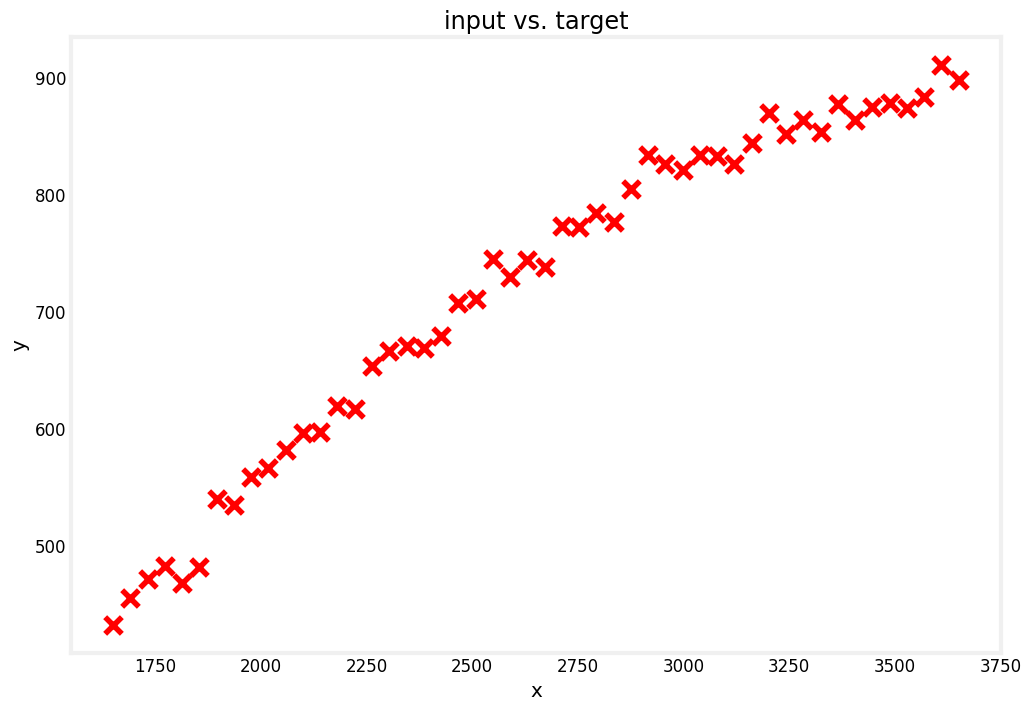

In [17]:
# Plot the entire dataset
utils.plot_dataset(x=x, y=y, title="input vs. target")

Hyperparameters in machine learning are parameters that are not learned from the training data but are set prior to the training process. They control various aspects of the learning process and the architecture of the machine learning model. Unlike the model's parameters, which are learned during training, hyperparameters are configured by the machine learning engineer or data scientist.

Example

- Learning Rate
- Number of Hidden Layers
- Batch Size
- Epoches
- Optimizer

### Split the dataset into training, cross validation, and test sets

We can do this by using train_test_split form scikit-learn

In [27]:
  # Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (30, 1)
the shape of the training set (target) is: (30, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


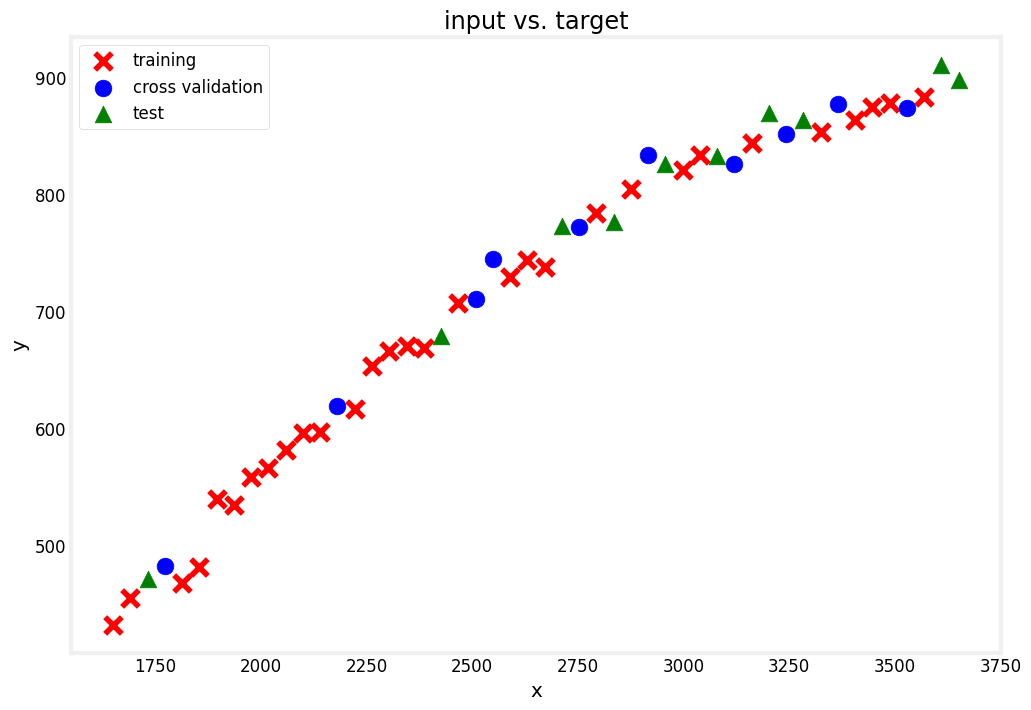

In [28]:
utils.plot_train_cv_test(x_train, y_train, x_cv, y_cv, x_test, y_test, title="input vs. target")

### Fit Linear Model

#### Feature Scaling

Computed mean of the training set: 2504.06
Computed standard deviation of the training set: 574.85


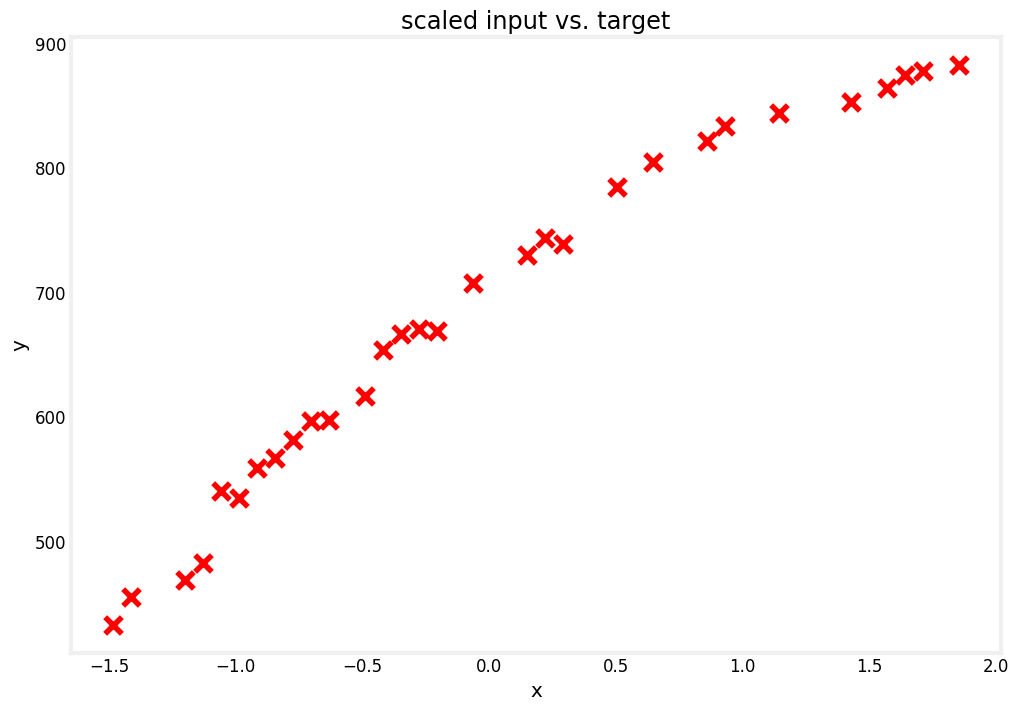

In [29]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(x_train)

print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

# Plot the results
utils.plot_dataset(x=X_train_scaled, y=y_train, title="scaled input vs. target")

In [30]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train )

LinearRegression()

### Evaluate the Model

To evaluate the performance of your model, you will want to measure the error for the training and cross validation sets. For the training error, recall the equation for calculating the mean squared error (MSE):

$$J_{train}(\vec{w}, b) = \frac{1}{2m_{train}}\left[\sum_{i=1}^{m_{train}}(f_{\vec{w},b}(\vec{x}_{train}^{(i)}) - y_{train}^{(i)})^2\right]$$

In [32]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

# for-loop implementation
total_squared_error = 0

for i in range(len(yhat)):
    squared_error_i  = (yhat[i] - y_train[i])**2
    total_squared_error += squared_error_i

mse = total_squared_error / (2*len(yhat))

print(f"training MSE (for-loop implementation): {mse.squeeze()}")

training MSE (using sklearn function): 406.19374192533155
training MSE (for-loop implementation): 406.19374192533155


As with the training set, you will also want to scale the cross validation set. An *important* thing to note when using the z-score is you have to use the mean and standard deviation of the **training set** when scaling the cross validation set. This is to ensure that your input features are transformed as expected by the model. One way to gain intuition is with this scenario:

In [31]:
# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_scaled = scaler_linear.transform(x_cv)

print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Mean used to scale the CV set: 2504.06
Standard deviation used to scale the CV set: 574.85
Cross validation MSE: 551.7789026952216


## Adding Polynomial Features

From the graphs earlier, you may have noticed that the target `y` rises more sharply at smaller values of `x` compared to higher ones. A straight line might not be the best choice because the target `y` seems to flatten out as `x` increases. Now that you have these values of the training and cross validation MSE from the linear model, you can try adding polynomial features to see if you can get a better performance. The code will mostly be the same but with a few extra preprocessing steps. Let's see that below.